## Experiments and Evaluation

We can compare to baseline weather prediction models. A persistence baseline is one where tomorrow's prediction is today's weather. A climatology forecast baseline averages historical data for a prediction that matches the climate of the region, but pays no attention to the dynamism of day to day weather. Finally, we can perform more standard metrics-based evaluation as is typical of machine learning models. 

For the prediction performance, root mean squared error and accuracy are used to evaluate between prediction values for temperature and precipitation and the weather records. Further, tracking signal is used for detecting whether bias changes in our model.
$$\text{RMSE} =  \sqrt{\frac{1}{T} \sum_{t = 1}^{T} \left(\hat{y}_t - y_t \right)^2}$$

A common method to evaluate weather prediction models is root mean squared error (RMSE). A smaller RMSE is optimal because it signifies a smaller magnitude of error. As more predictions are generated for future points in time, we will be able to graph how RMSE changes. It is generally difficult to predict weather after 10 days, so we expect the RMSE to increase as more predictions are made, and we may anticipate a spike in RMSE after 10 days. Our team plans to evaluate the validity of this statement based on newer models.

Accuracy could be another method to evaluate time series prediction. Besides judging from the magnitude of accuracy, the tendency of accuracy change in the long forecasting could reflect the stability of our model. Small slope of accuracy curve indicates smoothly decreasing of accuracy in terms of prediction period.   
While RMSE captures the magnitude of error, it does not evaluate bias. In order to determine whether our model is consistently making the same type of error (e.g. the model constantly overpredicts temperature), we will also keep track of the tracking signal (TS), which is calculated by the following equation.

$$\text{Tracking Signal} =  \frac{1}{\text{MAD}} \sum_{t = 1}^{T} \left(a_t - f_t \right)^2 $$

$$\text{MAD} =  \frac{1}{n} \sum_{t = 1}^{T} | \hat{y}_t - y_t |$$

A TS of greater than 4 or less than -- 4 indicates the presence of consistent bias in our predictions, so such TS's necessitate the revision of our models to be more complex. We do not foresee this being a problem, since the models we will be using are highly parameterized, but weather is a complicated phenomenon with numerous interactions, so our models may not be able to capture all of the relations and patterns between climate factors, especially as we predict weather farther from the present.

### Imports and reading in temperature and precipitation predictions

In [1]:
import pandas as pd
import requests
import io
    
url1 = "https://raw.githubusercontent.com/abadari3/CSE6242_Weather_Forecasting/main/CODE/forecasts/precipitation_forecasts.csv" # Make sure the url is the raw version of the file on GitHub
download1 = requests.get(url1).content
precipitation = pd.read_csv(io.StringIO(download1.decode('utf-8')))

url2 = "https://raw.githubusercontent.com/abadari3/CSE6242_Weather_Forecasting/main/CODE/forecasts/temperature_forecasts.csv"
download2 = requests.get(url2).content
temperature = pd.read_csv(io.StringIO(download2.decode('utf-8')))

In [2]:
temperature.head()

,time,lat,lon,cnn,persistence,ann,resnet,climatology,linreg,true
0,2018-12-02 00:00:00,19.6875,-129.375,23.539154,22.628998,23.539154,22.525696,20.562073,22.635956,22.199127
1,2018-12-02 00:00:00,19.6875,-123.750,23.362488,22.402191,23.362488,21.948486,20.387848,22.236237,21.710602
2,2018-12-02 00:00:00,19.6875,-118.125,23.290802,22.865631,23.290802,22.185303,20.970978,22.797913,21.457000
3,2018-12-02 00:00:00,19.6875,-112.500,24.537994,25.372528,24.537994,23.614227,23.275848,25.416962,22.807190
4,2018-12-02 00:00:00,19.6875,-106.875,27.547943,28.456604,27.547943,25.080658,26.250030,28.418701,25.449890


## RMSE and Tracking Signal Calculation

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
def print_rmse(temp_bool, model):
    '''
    temp_bool(Boolean) = True if temperature, False if precipitation
    model(string) = model type
    
    '''
    
    if temp_bool == True:
        temp_rmse = sqrt(mean_squared_error(temperature['true'], temperature[model]))
        print("RMSE for {} temperature predictions: {}".format(model, temp_rmse))
    else:
        prec_rmse = sqrt(mean_squared_error(precipitation['true'], precipitation[model]))
        print("RMSE for {} precipitation predictions: {}".format(model, prec_rmse))
        
def print_ts(temp_bool, model):
    '''
    temp_bool(Boolean) = True if temperature, False if precipitation
    model(string) = model type
    
    '''
    if temp_bool == True:
        all_errors = sum(temperature['true'] - temperature[model])
        mad = sum(abs(temperature['true'] - temperature[model]))/len(temperature)
        ptype = "temperature"
    else:
        all_errors = sum(precipitation['true'] - precipitation[model])
        mad = sum(abs(precipitation['true'] - precipitation[model]))/len(precipitation)
        ptype = "precipitation"
    
    ts = all_errors/mad
    print("Tracking signal for {} {} predictions: {}".format(model, ptype ,ts))
        
    

### Temperature RMSE

In [5]:
for i in ("persistence", "climatology", "linreg", "cnn", "ann", "resnet"):
    print_rmse(True, i)

RMSE for persistence temperature predictions: 4.9583805972551
RMSE for climatology temperature predictions: 6.49339788733541
RMSE for linreg temperature predictions: 4.892994529497044
RMSE for cnn temperature predictions: 5.7868537805016915
RMSE for ann temperature predictions: 5.7868537805016915
RMSE for resnet temperature predictions: 4.999527295761126


### Precipitation RMSE

In [6]:
for i in ("persistence", "climatology", "linreg", "cnn", "ann", "resnet"):
    print_rmse(False, i)

RMSE for persistence precipitation predictions: 0.0005516139134835328
RMSE for climatology precipitation predictions: 0.0006100854097530354
RMSE for linreg precipitation predictions: 0.0005565754581052383
RMSE for cnn precipitation predictions: 0.000567829215889841
RMSE for ann precipitation predictions: 0.000567829215889841
RMSE for resnet precipitation predictions: 0.0005472448111353846


### Temperature Tracking Signal

In [7]:
for i in ("persistence", "climatology", "linreg", "cnn", "ann", "resnet"):
    print_ts(True, i)

Tracking signal for persistence temperature predictions: 0.06603150205992935
Tracking signal for climatology temperature predictions: 0.05635253708021157
Tracking signal for linreg temperature predictions: 0.0738529089045817
Tracking signal for cnn temperature predictions: 0.061988041274314364
Tracking signal for ann temperature predictions: 0.061988041274314364
Tracking signal for resnet temperature predictions: 0.06762291026829927


### Precipitation Tracking Signal

In [8]:
for i in ("persistence", "climatology", "linreg", "cnn", "ann", "resnet"):
    print_ts(False, i)

Tracking signal for persistence precipitation predictions: -0.0016770312978774333
Tracking signal for climatology precipitation predictions: -0.0007930622523108693
Tracking signal for linreg precipitation predictions: -0.0005018885755302876
Tracking signal for cnn precipitation predictions: -0.0023040368649207693
Tracking signal for ann precipitation predictions: -0.0023040368649207693
Tracking signal for resnet precipitation predictions: -0.0015872437058931988


## Plotting RMSE with respect to days passed

In [12]:
import matplotlib.pyplot as plt

In [31]:
def plot_rmse_progression(latitude, longitude, model):
    '''
    plots the progression of RMSE with respect to days passed
    
    params
        longitude, latitude: the location of predictions made. must be a valid coordinate
        model: the model whose RMSE to plot
    '''
    temp_short = temperature[(temperature["lat"] == latitude) & (temperature["lon"] == longitude)]
    running_rmse = []
    
    for i in range(1,len(temp_short)):
        tm = temp_short[:i]
        rmse = sqrt(mean_squared_error(tm['true'], tm[model]))
        running_rmse.append(rmse)


    days_passed = range(1, len(temp_short))

    plt.plot(days_passed, running_rmse)
    plt.xlabel('Days Passed')
    plt.ylabel('RMSE')
    plt.title("RMSE Progression")
    plt.show()




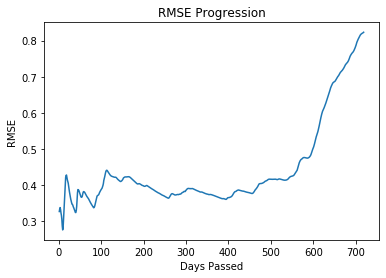

In [32]:
plot_rmse_progression(19.6875, -129.375, "resnet")